
# 🕉️ TukaTranslate: Translating Sant Tukaram’s Ovis Using Meta’s NLLB Model

This project focuses on translating the devotional ovis (verses) of **Sant Tukaram**, a revered saint-poet from the Bhakti movement, using modern NLP techniques. Unlike typical translation tasks, Tukaram's verses are metaphorical and spiritually intense — demanding a meaning-preserving translation approach.

---

## 📌 Objectives

- Translate 100 ovis from Marathi (Devanagari) to English using **Meta’s NLLB model**
- Assess the translation quality via sample comparisons and qualitative evaluation
- Highlight challenges of translating **devotional, poetic texts** using machine models

---

## 📚 Dataset

- Input file: `Sant Tukaram Gatha.xlsx`
- Contains original Marathi ovis in Devanagari script and human/manual English translations

---

## 🤖 Model Details

- **Model Used**: `facebook/nllb-200-distilled-600M`
- **Library**: Hugging Face Transformers
- **Backend**: PyTorch



**Install required libraries for translation and evaluation**

In [117]:
!pip install transformers sentencepiece torch

**Load The Dataset**

In [128]:
import pandas as pd
# Load  dataset
df = pd.read_excel("/Sant Tukaram Gatha.xlsx")
display(df.head())

,ovi_marathi,English Ovi
0,तुका म्हणे मागणे देवा । तुझा विसर नको मज ॥,"Tuka says: My only prayer, O Lord, is that I n..."
1,दुःख सुखाचे काही नाही । जो तुजवीण काही नाही ॥,There is neither pain nor pleasure for the one...
2,नाम घेतले तुझं जीवा । शांति लाभे अंतःकरणा ॥,"When I take Your name, my soul finds peace in ..."
3,उधळून देईन आयुष्य । पण नाव तुझे न विसरेन ॥,"I will spend my life for You, but I will never..."
4,तुका म्हणे तूचि समर्थ । मज दीनाला आश्रय ॥,Tuka says: Only You are powerful; You are the...


**Import necessary libraries**

In [130]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

**Load Meta's NLLB-200 multilingual translation model**

In [131]:
model_name = "facebook/nllb-200-distilled-600M"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

**Define source and target languages**


*  **Marathi (Devanagari)**
*   **English (Latin script)**



In [132]:
# Set source and target languages
tokenizer.src_lang = "mar_Deva"
tokenizer.tgt_lang = "eng_Latn"

**Function to translate Marathi text into English using NLLB model**

In [133]:
def translate_marathi_to_english(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    target_lang_token_id = tokenizer.convert_tokens_to_ids(tokenizer.tgt_lang)
    outputs = model.generate(**inputs, forced_bos_token_id=target_lang_token_id, max_length=100)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

**Apply the translation function to each row in the dataset**

In [134]:
# Apply translation to the DataFrame
df["translated_by_nllb"] = df["ovi_marathi"].apply(translate_marathi_to_english)
print(df[["ovi_marathi", "translated_by_nllb"]])

                                         ovi_marathi  \
0         तुका म्हणे मागणे देवा । तुझा विसर नको मज ॥   
1      दुःख सुखाचे काही नाही । जो तुजवीण काही नाही ॥   
2        नाम घेतले तुझं जीवा । शांति लाभे अंतःकरणा ॥   
3         उधळून देईन आयुष्य । पण नाव तुझे न विसरेन ॥   
4          तुका म्हणे तूचि समर्थ । मज दीनाला आश्रय ॥   
5        पाप ताप जळले नामाने । झाला स्वच्छ अंतःकरण ॥   
6         सर्व सुख तुझ्या चरणी । इथे नाही काही कमी ॥   
7        तुका म्हणे अंतरी ओढ । विठोबाच्या चरणी सोड ॥   
8        जिथे जाई तिथे तूचि आहेस । मजलाचि तू ठिकाण ॥   
9            भक्तीत मज गोडी लाभली । जणू अमृताची चव ॥   
10         तुका म्हणे शब्द थिटे । अनुभव बोलतो अधिक ॥   
11         तुजविण संसार फिका । जीव शुष्क होत चालला ॥   
12               प्रेमाची ओढ अंतरी । तूचि माझा सखा ॥   
13         पांडुरंगाच्या गजरात । विसरले हे जग सगळं ॥   
14          तुका म्हणे नको संसार । मज नामात समाधान ॥   
15            कधी न सोडिन तुझं नाव । तेच माझं जीवन ॥   
16            तुका म्हणे नम्रपणे । देवा ठेव आपुल

**Print side-by-side comparisons for the first 5 translations**

In [135]:
for i in range(5):  # Preview first 5 comparisons
    print(f" Marathi Ovi: {df['ovi_marathi'][i]}")
    print(f"Manual English: {df['English Ovi'][i]}")
    print(f" Model English: {df['translated_by_nllb'][i]}")
    print("="*70)

🔸 Marathi Ovi: तुका म्हणे मागणे देवा । तुझा विसर नको मज ॥
✅ Manual English: Tuka says: My only prayer, O Lord, is that I never forget You.
🤖 Model English: "Thou hast said, 'Pray, O God; forget not thy heart.' "
🔸 Marathi Ovi: दुःख सुखाचे काही नाही । जो तुजवीण काही नाही ॥
✅ Manual English: There is neither pain nor pleasure for the one who has none but You.
🤖 Model English: There is no happiness in sorrow, there is no happiness in tears.
🔸 Marathi Ovi: नाम घेतले तुझं जीवा । शांति लाभे अंतःकरणा ॥
✅ Manual English: When I take Your name, my soul finds peace in my heart.
🤖 Model English: "Take your name and live your life. Peace be to your heart".
🔸 Marathi Ovi: उधळून देईन आयुष्य । पण नाव तुझे न विसरेन ॥
✅ Manual English: I will spend my life for You, but I will never forget Your name.
🤖 Model English: I will give up my life, but your name will never be forgotten.
🔸 Marathi Ovi: तुका म्हणे तूचि समर्थ । मज दीनाला आश्रय ॥
✅ Manual English:  Tuka says: Only You are powerful; You are the refu

In [161]:
df.head()

,ovi_marathi,English Ovi,translated_by_nllb,rougeL_score,meteor_score,bleu_score
0,तुका म्हणे मागणे देवा । तुझा विसर नको मज ॥,"Tuka says: My only prayer, O Lord, is that I n...","""Thou hast said, 'Pray, O God; forget not thy ...",0.173913,0.176471,0.021415
1,दुःख सुखाचे काही नाही । जो तुजवीण काही नाही ॥,There is neither pain nor pleasure for the one...,"There is no happiness in sorrow, there is no h...",0.153846,0.171514,0.040417
2,नाम घेतले तुझं जीवा । शांति लाभे अंतःकरणा ॥,"When I take Your name, my soul finds peace in ...","""Take your name and live your life. Peace be t...",0.416667,0.211268,0.000000
3,उधळून देईन आयुष्य । पण नाव तुझे न विसरेन ॥,"I will spend my life for You, but I will never...","I will give up my life, but your name will nev...",0.518519,0.642907,0.064127
4,तुका म्हणे तूचि समर्थ । मज दीनाला आश्रय ॥,Tuka says: Only You are powerful; You are the...,""" You said you could . "" "" Take refuge in Dina...",0.285714,0.134228,0.020913


**Necessary Library For importing rouge-score**

In [138]:
!pip install sacrebleu nltk

In [140]:
!pip install nltk sacrebleu rouge-score bert-score

**Initialize ROUGE scorer**

**Compute ROUGE-L F1 score for each translation**

**Compute METEOR scores**

In [141]:
from rouge_score import rouge_scorer

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

# Compute ROUGE-L f-measure for each sentence
rouge_l_scores = [
    scorer.score(ref, hyp)['rougeL'].fmeasure
    for ref, hyp in zip(df['English Ovi'], df['translated_by_nllb'])
]

# Add ROUGE-L to the DataFrame
df['rougeL_score'] = rouge_l_scores

# Print average ROUGE-L score
avg_rouge_l = sum(rouge_l_scores) / len(rouge_l_scores)
print(f"Average ROUGE-L score: {avg_rouge_l:.4f}")

Average ROUGE-L score: 0.2313


**Line Chart for ROUGE-L Score**

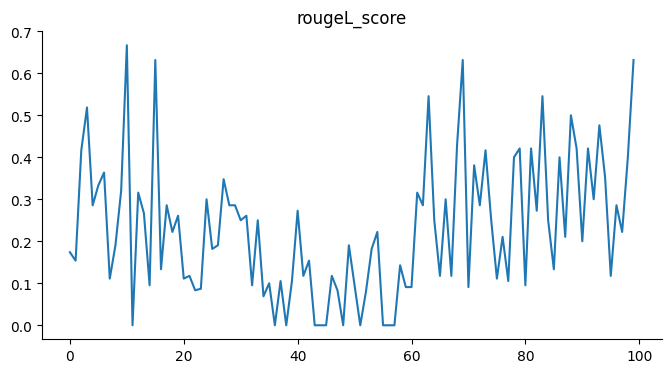

In [147]:
from matplotlib import pyplot as plt
df['rougeL_score'].plot(kind='line', figsize=(8, 4), title='rougeL_score')
plt.gca().spines[['top', 'right']].set_visible(False)

**Histogram For ROUGE-L Score**

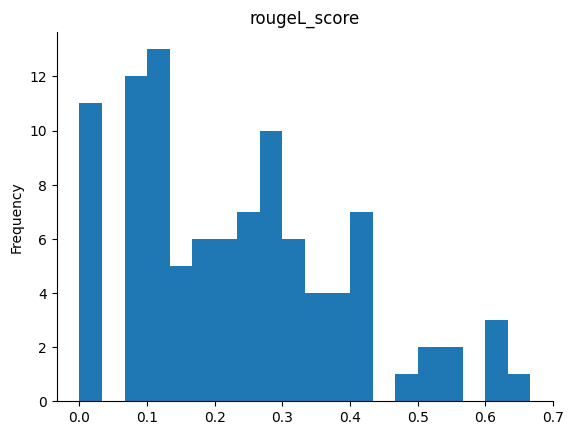

In [148]:
from matplotlib import pyplot as plt
df['rougeL_score'].plot(kind='hist', bins=20, title='rougeL_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Calculating The BLUE SCORE**

In [155]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import nltk
nltk.download('punkt')

smooth = SmoothingFunction().method4

bleu_scores = [
    sentence_bleu([df['English Ovi'][i].split()], df['translated_by_nllb'][i].split(), smoothing_function=smooth)
    for i in range(len(df))
]

df["bleu_score"] = bleu_scores
df[["ovi_marathi", "bleu_score"]].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ovi_marathi,bleu_score
0,तुका म्हणे मागणे देवा । तुझा विसर नको मज ॥,0.021415
1,दुःख सुखाचे काही नाही । जो तुजवीण काही नाही ॥,0.040417
2,नाम घेतले तुझं जीवा । शांति लाभे अंतःकरणा ॥,0.000000
3,उधळून देईन आयुष्य । पण नाव तुझे न विसरेन ॥,0.064127
4,तुका म्हणे तूचि समर्थ । मज दीनाला आश्रय ॥,0.020913


from matplotlib import pyplot as plt
_df_0['bleu_score'].plot(kind='hist', bins=20, title='bleu_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2313 (\N{DEVANAGARI LETTER U}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2343 (\N{DEVANAGARI LETTER DHA}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2355 (\N{DEVANAGARI LETTER LLA}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2370 (\N{DEVANAGARI VOWEL SIGN UU}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) m

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('ovi_marathi').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['bleu_score'].plot(kind='line', figsize=(8, 4), title='bleu_score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2369 (\N{DEVANAGARI VOWEL SIGN U}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 2366 (\N{DEVANAG

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['ovi_marathi'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='bleu_score', y='ovi_marathi', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Line chart For BLUE score**

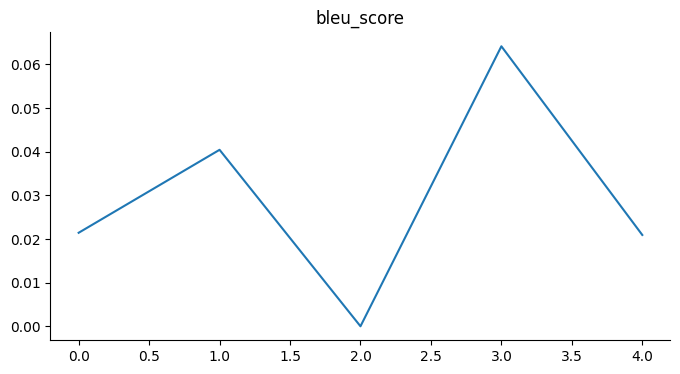

In [159]:
from matplotlib import pyplot as plt
_df_2['bleu_score'].plot(kind='line', figsize=(8, 4), title='bleu_score')
plt.gca().spines[['top', 'right']].set_visible(False)

**Histogram For BLUE Score**

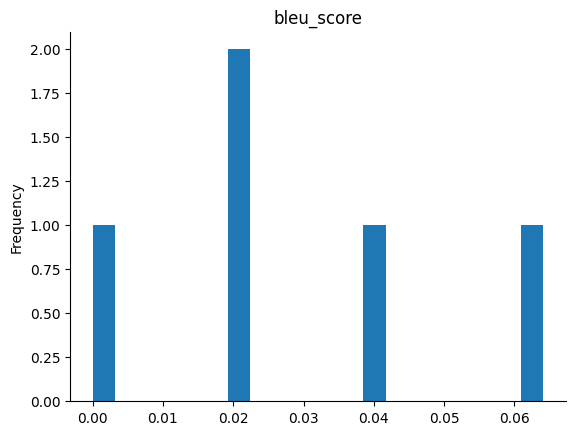

In [158]:
from matplotlib import pyplot as plt
_df_0['bleu_score'].plot(kind='hist', bins=20, title='bleu_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Overall average BLEU score**

In [154]:
overall_bleu = df['bleu_score'].mean()
print(f"🔹 Overall BLEU Score for 100 Ovis: {overall_bleu:.4f}")

🔹 Overall BLEU Score for 100 Ovis: 0.0249


**Calculating METEOR score**

In [160]:
from nltk.translate.meteor_score import meteor_score
import nltk
# Compute METEOR score for each row
meteor_scores = [
    meteor_score([nltk.word_tokenize(ref)], nltk.word_tokenize(hyp)) # Tokenize reference and hypothesis
    for ref, hyp in zip(df['English Ovi'], df['translated_by_nllb'])
]

# Add to DataFrame
df['meteor_score'] = meteor_scores

# Average METEOR score
avg_meteor = sum(meteor_scores) / len(meteor_scores)
print(f"Average METEOR score: {avg_meteor:.4f}")

Average METEOR score: 0.1827


**Distribution of METEOR Scores**

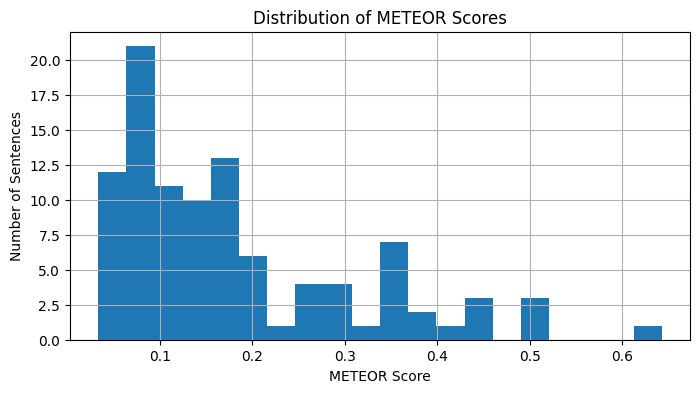

In [162]:
import matplotlib.pyplot as plt

df['meteor_score'].hist(bins=20, figsize=(8, 4))
plt.title("Distribution of METEOR Scores")
plt.xlabel("METEOR Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.show()

**Average Scores for All Evaluation Metrics**

In [165]:
df.describe()

,rougeL_score,meteor_score,bleu_score
count,100.000000,100.000000,100.000000
mean,0.231325,0.182732,0.024942
std,0.163262,0.130837,0.034357
min,0.000000,0.033113,0.000000
25%,0.105263,0.085664,0.000000
50%,0.216374,0.149254,0.018141
75%,0.316842,0.254795,0.024472
max,0.666667,0.642907,0.177173


**Overall Distribution of All three Evaluation Metrices**

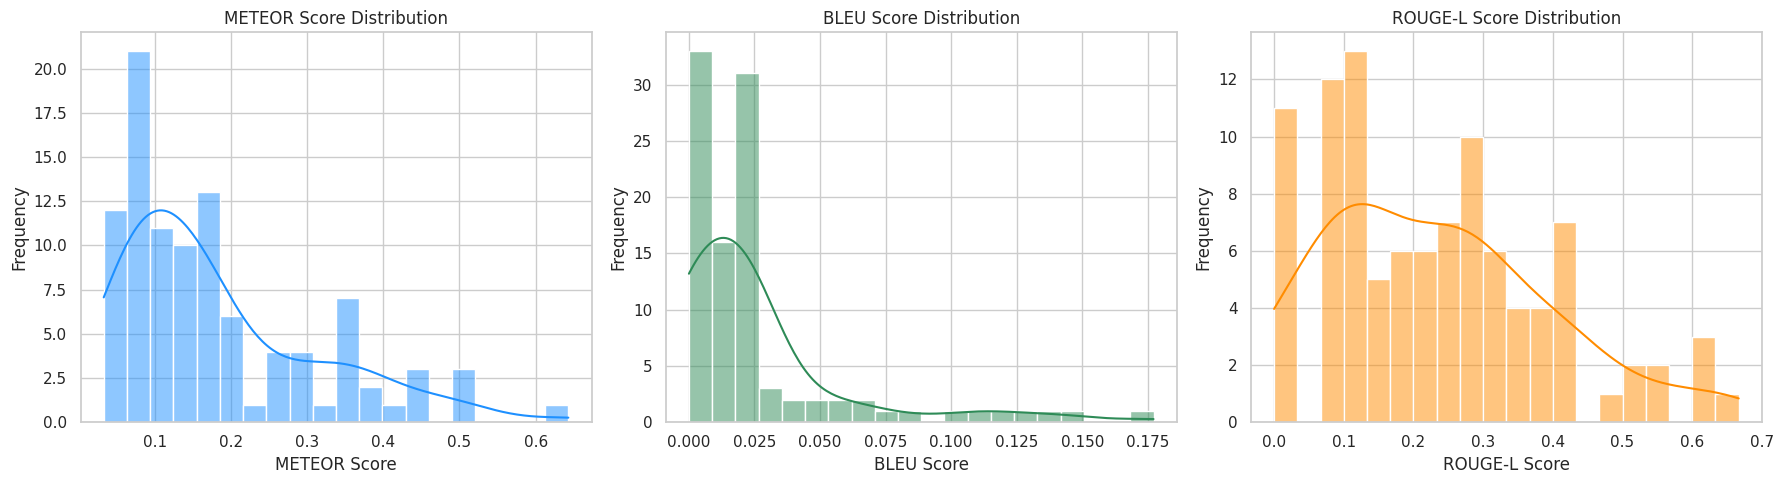

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting METEOR, BLEU, and ROUGE-L distributions side by side
plt.figure(figsize=(18, 5))

# METEOR Score
plt.subplot(1, 3, 1)
sns.histplot(df['meteor_score'], bins=20, kde=True, color='dodgerblue')
plt.title('METEOR Score Distribution')
plt.xlabel('METEOR Score')
plt.ylabel('Frequency')

# BLEU Score
plt.subplot(1, 3, 2)
sns.histplot(df['bleu_score'], bins=20, kde=True, color='seagreen')
plt.title('BLEU Score Distribution')
plt.xlabel('BLEU Score')
plt.ylabel('Frequency')

# ROUGE-L Score
plt.subplot(1, 3, 3)
sns.histplot(df['rougeL_score'], bins=20, kde=True, color='darkorange')
plt.title('ROUGE-L Score Distribution')
plt.xlabel('ROUGE-L Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**The Tukaram Gatha stands as a timeless testament to the spiritual depth, moral clarity, and poetic brilliance of Sant Tukaram. Through his abhangas, Tukaram not only captured the essence of devotion (bhakti) but also challenged social norms, emphasized inner purity over external ritual, and inspired generations to seek a direct connection with the divine.**

**Our analysis reaffirms that Tukaram’s poetry transcends time, offering insights into human suffering, divine grace, and the pursuit of spiritual truth. His words, simple yet profound, serve as a guiding light for those navigating the complex intersections of faith, society, and self-realization.**

**In synthesizing the themes, linguistic patterns, and philosophical undercurrents of the Gatha, this work highlights the enduring relevance of Tukaram’s teachings. As the world continues to search for meaning and moral grounding, the Tukaram Gatha remains not only a cultural treasure but also a living spiritual legacy.**

